<a href="https://colab.research.google.com/github/indrap23/PJJDA/blob/main/PengenalanNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PJJ Data Analytics Specialist Angkatan I Tahun 2023**

**Basic Machine Learning**

oleh: Aris Budi Santoso SST.,MTI.

## Vectorization

### Bag of Word

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

### Corpus data

In [12]:
corpus = ['mantap layarnya jernih dan resolusinya bagus',
          'keren ukurannya sesuai dan bentuknya modern',
          'tombolnya payah gampang lepas dan rusak',
          'bohong nih fitur ngga sesuai sama spek dan jelek',
          'hp yang bagus fiturnya lengkap dan ok',
          'gila harganya mahal banget dan kacau']

In [13]:
countVectorizer = CountVectorizer()

In [14]:
X = countVectorizer.fit_transform(corpus)

In [15]:
X = X.toarray()

In [16]:
X

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [17]:
cols = sorted(countVectorizer.vocabulary_.keys())

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(X, columns = cols)

In [ ]:
df.head()

,bagus,banget,bentuknya,bohong,dan,fitur,fiturnya,gampang,gila,harganya,...,ok,payah,resolusinya,rusak,sama,sesuai,spek,tombolnya,ukurannya,yang
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
4,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:
# Get feature names (words) from CountVectorizer
words = countVectorizer.get_feature_names_out()

# Sum the counts for each word across all documents in X
word_counts = X.sum(axis=0)

# Create a dictionary of word frequencies
word_freq_dict = dict(zip(words, word_counts))

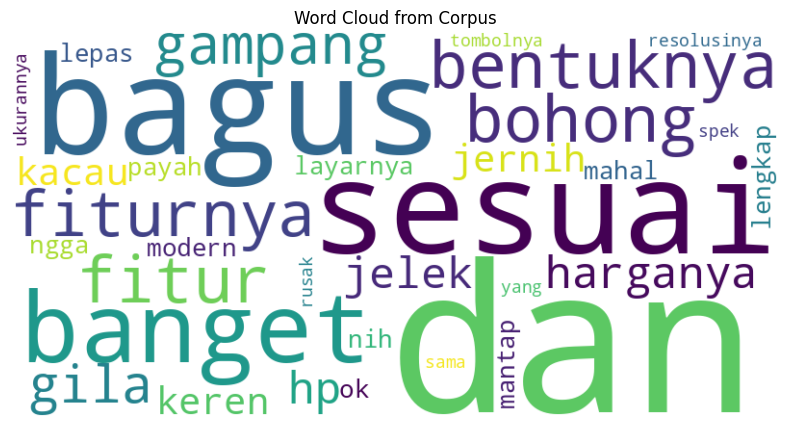

In [24]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Corpus')
plt.show()

### TF-IDF Vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf = TfidfVectorizer()

In [27]:
X_tfidf = tfidf.fit_transform(corpus)

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame(X_tfidf[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

In [ ]:
df

,TF-IDF
resolusinya,0.453168
jernih,0.453168
layarnya,0.453168
mantap,0.453168
bagus,0.371604
dan,0.201161
spek,0.000000
sesuai,0.000000
sama,0.000000
rusak,0.000000


In [30]:
df = pd.DataFrame(X_tfidf[5].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

In [31]:
df

,TF-IDF
banget,0.438654
mahal,0.438654
gila,0.438654
kacau,0.438654
harganya,0.438654
dan,0.194718
bagus,0.000000
bohong,0.000000
fitur,0.000000
gampang,0.000000


### Sentimen Analysis

In [32]:
import pandas as pd

In [33]:
corpus

['mantap layarnya jernih dan resolusinya bagus',
 'keren ukurannya sesuai dan bentuknya modern',
 'tombolnya payah gampang lepas dan rusak',
 'bohong nih fitur ngga sesuai sama spek dan jelek',
 'hp yang bagus fiturnya lengkap dan ok',
 'gila harganya mahal banget dan kacau']

#### Manual Labeling

In [34]:
labels = [1,1,0,0,1,0]

In [36]:
dffeature = pd.DataFrame(X, columns=sorted(countVectorizer.vocabulary_.keys()))

In [37]:
dffeature

,bagus,banget,bentuknya,bohong,dan,fitur,fiturnya,gampang,gila,harganya,...,ok,payah,resolusinya,rusak,sama,sesuai,spek,tombolnya,ukurannya,yang
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
4,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
selbl = pd.Series(labels)

In [39]:
dffeature['class'] = selbl.values

In [40]:
dffeature.head(5)

,bagus,banget,bentuknya,bohong,dan,fitur,fiturnya,gampang,gila,harganya,...,payah,resolusinya,rusak,sama,sesuai,spek,tombolnya,ukurannya,yang,class
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,0,0,0,1,1,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


#### Dataset

In [41]:
features = ['mantap','bagus','bohong','mahal','modern','lengkap','jelek','jernih', 'gila','payah', 'rusak','sesuai']
sets = ['mantap','bagus','bohong','mahal','modern','lengkap','jelek','jernih', 'gila','payah', 'rusak','sesuai','class']
dset = dffeature[sets]

In [42]:
dset

,mantap,bagus,bohong,mahal,modern,lengkap,jelek,jernih,gila,payah,rusak,sesuai,class
0,1,1,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0,1,0,0,0,0


#### Vektorisasi data baru yang akan diprediksi

In [43]:
import numpy as np

In [44]:
txt = 'lengkap banget fiturnya dan bagus'

In [45]:
Xn = countVectorizer.transform([txt])

In [46]:
dfn = pd.DataFrame(countVectorizer.get_feature_names_out(), columns=["feat"])


In [47]:
counts = [a[0] for a in np.array(Xn[0].T.todense())]

In [48]:
dfn['count'] = np.array(counts)

In [49]:
dfn

,feat,count
0,bagus,1
1,banget,1
2,bentuknya,0
3,bohong,0
4,dan,1
5,fitur,0
6,fiturnya,1
7,gampang,0
8,gila,0
9,harganya,0


#### Klasifikasi Sentimen dengan Algoritma Naive Bayes

**Naive Bayes**

**Prediksi post probability berdasarkan prior probability**

P(c|x) = P(x|c)*P(c)

**Membandingkan nilai post proability dari setiap class/ target prediksi**

P(1|x1...xn) = P(x1|1)P(X2|1) .....P(Xn|1)P(1)

P(0|x1...xn) = P(x1|0)P(X2|0) .....P(Xn|0)P(0)

In [ ]:
import numpy as np

In [ ]:
p11 = len(dset[dset['mantap'] == 1][dset['class'] == 1])/len(dset)

<ipython-input-38-40d981424885>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p11 = len(dset[dset['mantap'] == 1][dset['class'] == 1])/len(dset)


In [ ]:
p11

0.16666666666666666

In [ ]:
dfkey = pd.DataFrame(features, columns=['feat'])

In [ ]:
test = pd.merge(dfkey, dfn, how='inner')

In [ ]:
test

,feat,count
0,mantap,0
1,bagus,1
2,bohong,0
3,mahal,0
4,modern,0
5,lengkap,1
6,jelek,0
7,jernih,0
8,gila,0
9,payah,0


In [ ]:
for index, row in test.iterrows():
  print(row['feat'])

mantap
bagus
bohong
mahal
modern
lengkap
jelek
jernih
gila
payah
rusak
sesuai


## Membuat function untuk menghitung probability

### Class probability

In [ ]:
def probC(c):
  prob = len(dset[dset['class'] == c]) / len(dset)
  return prob


### Prior probability

In [ ]:
def probXc(x,vx,c):
  return len(dset[dset[x] == vx][dset['class'] == c])/len(dset)

## Klasifikasi sentimen menggunakan Naive Bayes

### Post Probability untuk Class 1 (sentimen positif)

In [ ]:
prob1 = 1
for index, row in test.iterrows():
  prob1 = prob1*probXc(row['feat'],row['count'],1)

<ipython-input-45-592e9cc3a837>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(dset[dset[x] == vx][dset['class'] == c])/len(dset)


In [ ]:
prob1 = prob1*probC(1)

In [ ]:
prob1

5.358367626886144e-06

### Post Probability untuk Class 0 (sentimen negatif)

In [ ]:
prob0 = 1
for index, row in test.iterrows():
  prob0 = prob0*probXc(row['feat'],row['count'],0)

<ipython-input-45-592e9cc3a837>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return len(dset[dset[x] == vx][dset['class'] == c])/len(dset)


In [ ]:
prob0=prob0*probC(0)

In [ ]:
prob0

0.0

### Menentukan Sentimen dengan Membandingkan Post Probability

In [ ]:
if(prob1 > prob0):
   print('1 - positive')
else:
  print('0-negative')

1 - positive


#### Klasifikasi Sentiment Menggunakan Library Scikit Learn (sklearn)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbc = GaussianNB()

In [ ]:
nbclf = nbc.fit(X,labels)

In [ ]:
ypred = nbclf.predict([counts])

In [ ]:
ypred

array([1])